## Описание проекта

* Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
* Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
* Сообщение — 3 рубля.
* 1 Гб интернет-трафика — 200 рублей.

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* Минута разговора — 1 рубль;
* Сообщение — 1 рубль;
* 1 Гб интернет-трафика: 150 рублей.

## Содержание
1. [Чтение данных](#read_data)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#research)
4. [Статистический анализ  данных](#stat)
5. [Выводы](#conclusion)

## Чтение данных <a name="read_data"></a>

In [48]:
#импорт библиотек и чтение файлов
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import plotly.graph_objs as go
import plotly.express as px

calls = pd.read_csv('downloads/calls.csv')
messages = pd.read_csv('downloads/messages.csv')
sessions = pd.read_csv('downloads/sessions.csv')
tariffs = pd.read_csv('downloads/tariffs.csv')
users = pd.read_csv('downloads/users.csv')

In [2]:
calls.head()

,Unnamed: 0,id,call_date,duration,user_id
0,0,1000_0,2018-07-25,0.00,1000
1,1,1000_1,2018-08-17,0.00,1000
2,2,1000_2,2018-06-11,2.85,1000
3,3,1000_3,2018-09-21,13.80,1000
4,4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  202607 non-null  int64  
 1   id          202607 non-null  object 
 2   call_date   202607 non-null  object 
 3   duration    202607 non-null  float64
 4   user_id     202607 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


In [4]:
messages.head()

,Unnamed: 0,id,message_date,user_id
0,0,1000_0,2018-06-27,1000
1,1,1000_1,2018-10-08,1000
2,2,1000_2,2018-08-04,1000
3,3,1000_3,2018-06-16,1000
4,4,1000_4,2018-12-05,1000


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    123036 non-null  int64 
 1   id            123036 non-null  object
 2   message_date  123036 non-null  object
 3   user_id       123036 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [6]:
sessions.head()

,Unnamed: 0,Unnamed: 0.1,id,mb_used,session_date,user_id
0,0,0,1000_0,112.95,2018-11-25,1000
1,1,1,1000_1,1052.81,2018-09-07,1000
2,2,2,1000_2,1197.26,2018-06-25,1000
3,3,3,1000_3,550.27,2018-08-22,1000
4,4,4,1000_4,302.56,2018-09-24,1000


In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   Unnamed: 0.1  149396 non-null  int64  
 2   id            149396 non-null  object 
 3   mb_used       149396 non-null  float64
 4   session_date  149396 non-null  object 
 5   user_id       149396 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.8+ MB


In [8]:
tariffs.head()

,Unnamed: 0,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,0,50,15360,500,550,200,3,3,smart
1,1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users.head()

,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   user_id     500 non-null    int64 
 2   age         500 non-null    int64 
 3   churn_date  38 non-null     object
 4   city        500 non-null    object
 5   first_name  500 non-null    object
 6   last_name   500 non-null    object
 7   reg_date    500 non-null    object
 8   tariff      500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


Пропуски наблюдаются только в столбце "churn_rate" в датасете users. Скорее всего, наличие пропуска здесь говорит о том, что пользователь продолжает пользоваться сотовой связью данного оператора.

Также в некоторых столбцах необходимо изменить тип данных.

## Предобработка данных <a name="preprocessing"></a>

In [11]:
#переведем столбцы к нужным типам данных:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [12]:
#переведем продолжительность звонка в числовой тип с округлением вверх:
calls['duration'] = np.ceil(calls['duration']).astype(int)

In [13]:
#сгрупируем количество звонков каждого пользователя по месяцам:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_count = calls.groupby(['user_id','month']).agg(calls=('duration', 'count'))

calls_count

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
...              ...
1498    10        41
1499    9          9
        10        68
        11        74
        12        69

[3174 rows x 1 columns]

In [14]:
#сгрупируем продолжительность звонков каждого пользователя по месяцам:
minutes_used = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

minutes_used

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
...                ...
1498    10         247
1499    9           70
        10         449
        11         612
        12         492

[3174 rows x 1 columns]

In [15]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,Unnamed: 0,id,message_date,user_id,month
0,0,1000_0,2018-06-27,1000,6
1,1,1000_1,2018-10-08,1000,10
2,2,1000_2,2018-08-04,1000,8
3,3,1000_3,2018-06-16,1000,6
4,4,1000_4,2018-12-05,1000,12


In [16]:
#сгрупируем количество отправленных сообщений каждого пользователя по месяцам:
messages_sent = messages.groupby(['user_id','month']).agg(messages=('message_date', 'count'))
messages_sent

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [17]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

In [18]:
#сгрупируем количество использованного траффика каждого пользователя по месяцам:
month_used_mb = sessions.groupby(['user_id', 'month']).agg({'mb_used' : 'sum'})
month_used_mb

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [19]:
#создадим общую таблицу из сгруппированных данных:
users_info = calls_count\
    .merge(minutes_used, left_index=True, right_index=True, how='outer')\
    .merge(messages_sent, left_index=True, right_index=True, how='outer')\
    .merge(month_used_mb, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')
users_info

,user_id,month,calls,minutes,messages,mb_used,Unnamed: 0,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3210,1499,9,9.0,70.0,11.0,1845.75,499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3211,1499,10,68.0,449.0,48.0,17788.51,499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,11,74.0,612.0,59.0,17963.31,499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


In [20]:
#удалим лишний столбец:
users_info = users_info.drop('Unnamed: 0', axis=1)

In [21]:
#сподсчитаем количество пропусков вполучившейся таблице:
users_info.isna().sum()

user_id          0
month            0
calls           40
minutes         40
messages       497
mb_used         11
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Пропуски во всех столбцах, кроме даты прекращения договора, означают, что данной услугой не пользовались. Следовательно, их нужно заменить нулями.

In [22]:
#заменим пропущенные значения:
users_info['calls'] = users_info['calls'].fillna(0)
users_info['minutes'] = users_info['minutes'].fillna(0)
users_info['messages'] = users_info['messages'].fillna(0)
users_info['mb_used'] = users_info['mb_used'].fillna(0)

In [23]:
#заменим название столбца:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [24]:
#присоединим информацию о тарифах к нашей сборной таблице:
users_info = users_info.merge(tariffs, on='tariff')

In [25]:
#удалим лишний столбец, т.к. он не несет в себе никакой информации:
users_info = users_info.drop('Unnamed: 0', axis=1)

In [26]:
users_info.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


## Исследовательский анализ данных <a name="research"></a>

In [27]:
#подсчитаем, сколько звонков, сообщений и траффика израсходовали пользователи сверху лимитов тарифа:
users_info['payed_calls'] = users_info['minutes'] - users_info['minutes_included']
users_info['payed_messages'] = users_info['messages'] - users_info['messages_included']
users_info['payed_traffic'] = users_info['mb_used'] - users_info['mb_per_month_included']

#заменим на ноль отрицательные значения, т.к. это означает, что включенные услуги были не полностью израсходованы:
for index in ['payed_calls', 'payed_messages', 'payed_traffic']:
    users_info.loc[users_info[index] < 0, index] = 0

#переведем мегабайты в гигабайты с округлением вверх:
users_info['payed_traffic'] = np.ceil(users_info['payed_traffic']/1024)

#подсчитаем выручку с каждого пользователя:
users_info['revenue'] = (
    users_info['payed_calls']*users_info['rub_per_minute'] 
    + users_info['payed_messages']*users_info['rub_per_message']
    + users_info['payed_traffic']*users_info['rub_per_gb']
    + users_info['rub_monthly_fee'])

In [28]:
users_info

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,payed_calls,payed_messages,payed_traffic,revenue
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,...,15360,500,550,200,3,3,0.0,0.0,6.0,1750.0
3210,1499,9,9.0,70.0,11.0,1845.75,35,NaT,Пермь,Гектор,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,1499,10,68.0,449.0,48.0,17788.51,35,NaT,Пермь,Гектор,...,15360,500,550,200,3,3,0.0,0.0,3.0,1150.0
3212,1499,11,74.0,612.0,59.0,17963.31,35,NaT,Пермь,Гектор,...,15360,500,550,200,3,3,112.0,9.0,3.0,1513.0


In [29]:
#подсчитаем средние значения по количеству звонков, сообщений, использованного траффика и длительности звонков:
stat_pivot = (
    users_info
    .pivot_table(index=['month', 'tariff'],\
                 values=['calls', 'minutes', 'messages', 'mb_used'])
    .reset_index()
)
stat_pivot.head()

,month,tariff,calls,mb_used,messages,minutes
0,1,smart,27.676471,8513.717647,18.235294,203.852941
1,1,ultra,59.444444,13140.681111,33.777778,428.111111
2,2,smart,40.189655,11597.054310,24.086207,298.689655
3,2,ultra,41.541667,11775.937500,21.958333,297.125000
4,3,smart,54.324675,15104.159091,31.857143,390.051948


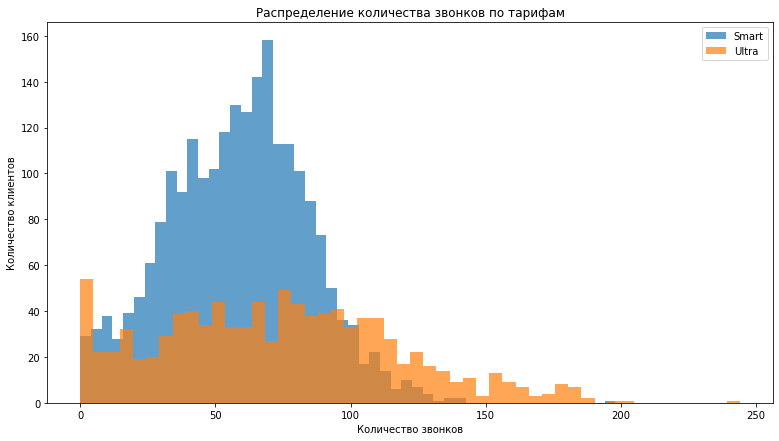

In [30]:
#посмотрим распределение звонков:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 7))
users_info.groupby('tariff')['calls'].plot(kind='hist', bins=50, alpha=0.7)
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества звонков по тарифам')
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов');

Клиенты тарифа Смарт в основном совершают от 25 до 100 звонков в месяц, при этом почти никто не совершает больше 140 звонков. Большинство клиентов тарифа Ультра совершают до 120 звонков, при этом часть клиентов звонили до 200 раз и более.

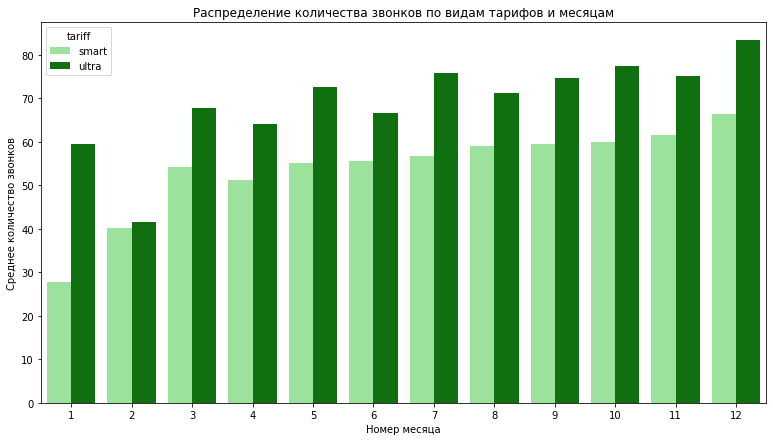

In [31]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='month',
            y='calls',
            hue="tariff",
            data=stat_pivot,
            palette=['lightgreen', 'green'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

Если построить график распределения по месяцам и тарифам, то видно, что пользователи тарифа ультра в среднем совершают больше звонков. При этом в обоих тарифах объем звонков постепенно возрастает от января к декабрю.

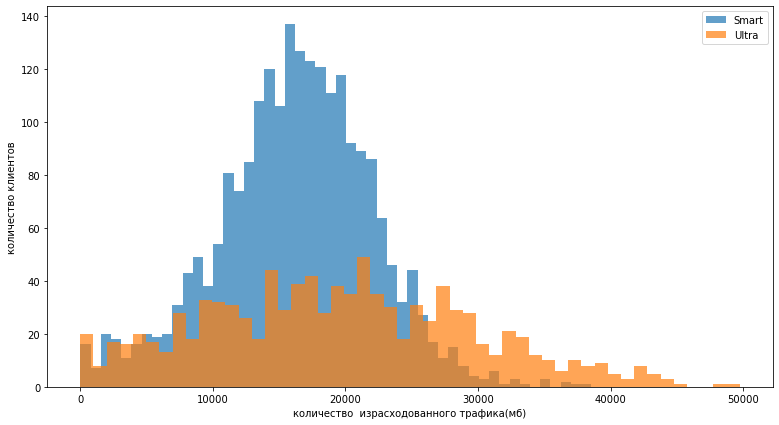

In [32]:
plt.figure(figsize=(13, 7))
users_info.groupby('tariff')['mb_used'].plot(kind='hist', bins=50, alpha=0.7)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('количество  израсходованного трафика(мб)')
plt.ylabel('количество клиентов');

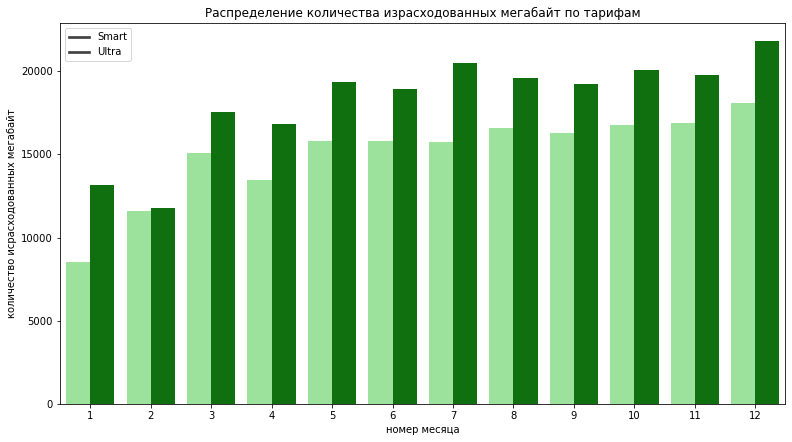

In [33]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='month',
                y='mb_used',
                hue='tariff',
                data=stat_pivot,
                palette=['lightgreen', 'green'])
plt.legend(['Smart', 'Ultra'])
plt.xlabel('номер месяца')
plt.ylabel('количество исрасходованных мегабайт')
plt.title('Распределение количества израсходованных мегабайт по тарифам');

Похожая картина и с распределением потраченных мегабайт: кажется, что объем трафика, израсходованного пользователями тарифа смарт, больше, но это не так: в среднем больше пользуются мобильным интернетом пользователи тарифа ультра. Объем трафика также постепенно возрастает от яндваря к декабрю и достигает максимума в конце года.

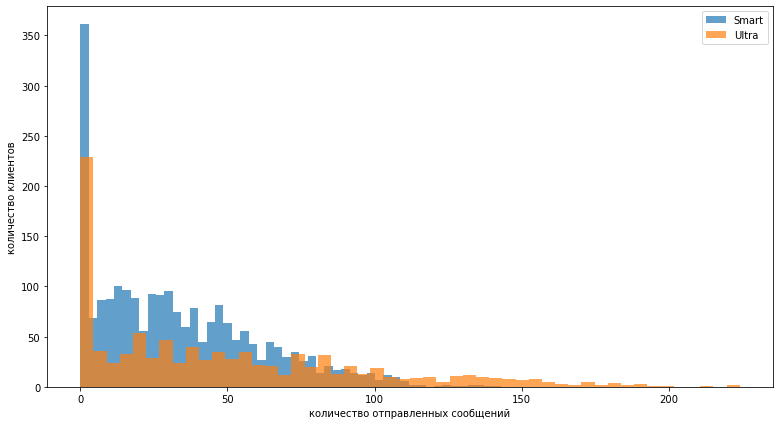

In [34]:
plt.figure(figsize=(13, 7))
users_info.groupby('tariff')['messages'].plot(kind='hist', bins=50, alpha=0.7)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('количество отправленных сообщений')
plt.ylabel('количество клиентов');

На гистограмме видно, что в обоих тарифах довольно много пользователей вообще не отправляли ни одного сообщения.

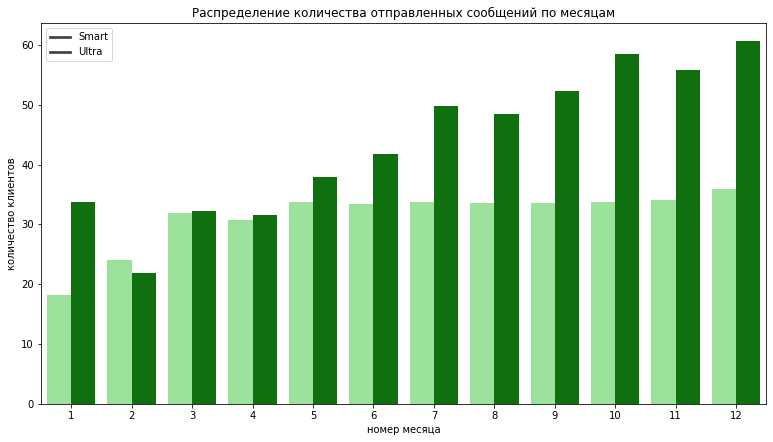

In [35]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='month',
                y='messages',
                hue='tariff',
                data=stat_pivot,
                palette=['lightgreen', 'green'])
plt.title('Распределение количества отправленных сообщений по месяцам')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('номер месяца')
plt.ylabel('количество клиентов');

Большую часть года количество отправленных сообщений больше у пользователей тарифа ультра. При этом в феврале, марте и апреле количество отправленных сообщений примерно одинаково по обоим тарифам.

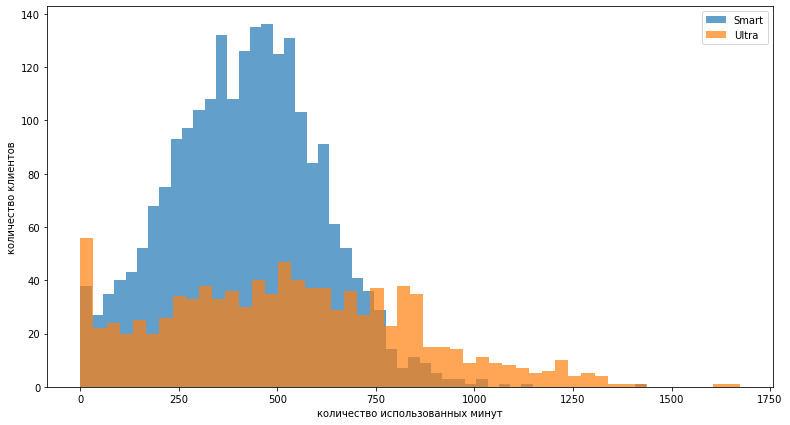

In [36]:
plt.figure(figsize=(13, 7))
users_info.groupby('tariff')['minutes'].plot(kind='hist', bins=50, alpha=0.7)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('количество использованных минут')
plt.ylabel('количество клиентов');

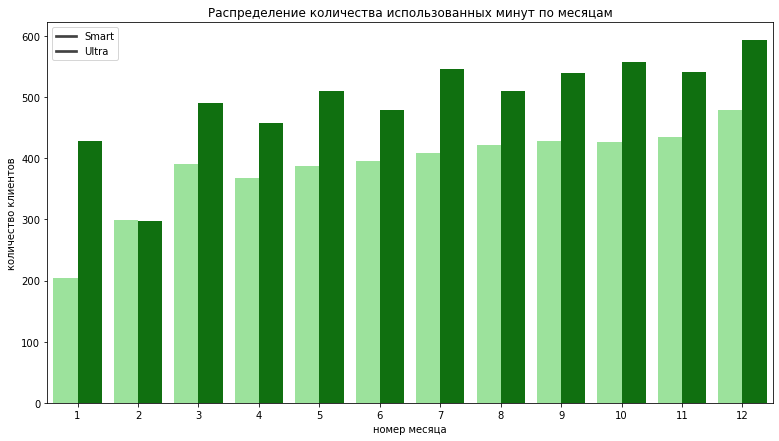

In [37]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='month',
                y='minutes',
                hue='tariff',
                data=stat_pivot,
                palette=['lightgreen', 'green'])
plt.title('Распределение количества использованных минут по месяцам')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('номер месяца')
plt.ylabel('количество клиентов');

Распределение количества использованных минут похоже на распределение количества звонков и использованного трафика: по гистограмме заметно преобладание в тарифе смарт, но в разбивке по месяцам практически весь год лидирует тариф ультра.

## Статистический анализ данных <a name="stat"></a>

In [38]:
#проверим гипотезу о том, что выручка пользователей тарифа Смарт равна выручке пользователей тарифа Ультра:
users_smart = users_info.query('tariff == "smart"')
users_ultra = users_info.query('tariff == "ultra"')

users_smart_test = users_smart['revenue']
users_ultra_test = users_ultra['revenue']

results = st.ttest_ind(users_smart_test,
                      users_ultra_test,
                      equal_var=False)
alpha = .05

if results.pvalue < alpha:
    display('p-value равно:', results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    display('p-value равно:', results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')

'p-value равно:'

4.2606313931076085e-250

'Отвергаем нулевую гипотезу'

In [42]:
#рассчитаем сумму выручки тарифа смарт:
users_smart['revenue'].sum()

945042.0

In [52]:
#рассчитаем основные показатели выручки тарифа смарт:
users_smart['revenue'].describe()

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

In [43]:
#рассчитаем сумму выручки тарифа ультра:
users_ultra['revenue'].sum()

3969409.0

In [53]:
#рассчитаем основные показатели выручки тарифа ультра:
users_ultra['revenue'].describe()

count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [55]:
fig = px.box(users_smart, x="revenue", width=900, height=300, title='Тариф смарт')
fig.show()

fig = px.box(users_ultra, x="revenue", width=900, height=300, title='Тариф ультра')
fig.show()

**Вывод**

Выручки пользователей разных тарифов различаются. Нулевая гипотеза отвегнута.

При этом медианная выручка тарифа смарт больше, но в тарифе ультра есть целый ряд пользователей, платящих по 3750 рублей и выше.

In [39]:
#проверим гипотезу о том, что выручка пользователей из Москвы больше, чем пользователей из других городов:
users_smart = users_info.query('city == "Москва"')
users_ultra = users_info.query('city != "Москва"')

users_smart_test = users_smart['revenue']
users_ultra_test = users_ultra['revenue']

results = st.ttest_ind(users_smart_test,
                      users_ultra_test,
                      equal_var=False)
alpha = .05

if results.pvalue < alpha:
    display('p-value равно:', results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    display('p-value равно:', results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')

'p-value равно:'

0.5257376663729298

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Выручка пользователей из Москвы и из других регионов не различается. Таким образом, нулевую гипотезу не получилось отвергнуть.

## Вывод <a name="conclusion"></a>

В ходе исследования было выявлено, что тариф ультра лучше: в нем пользователи больше пользуются услугами (больше использованных минут, звонков, количества трафика и отправленных смс) в течение практически всего года.
Кроме того, в тарифе ультра больше пользователей, платящих больше 4000 в месяц.